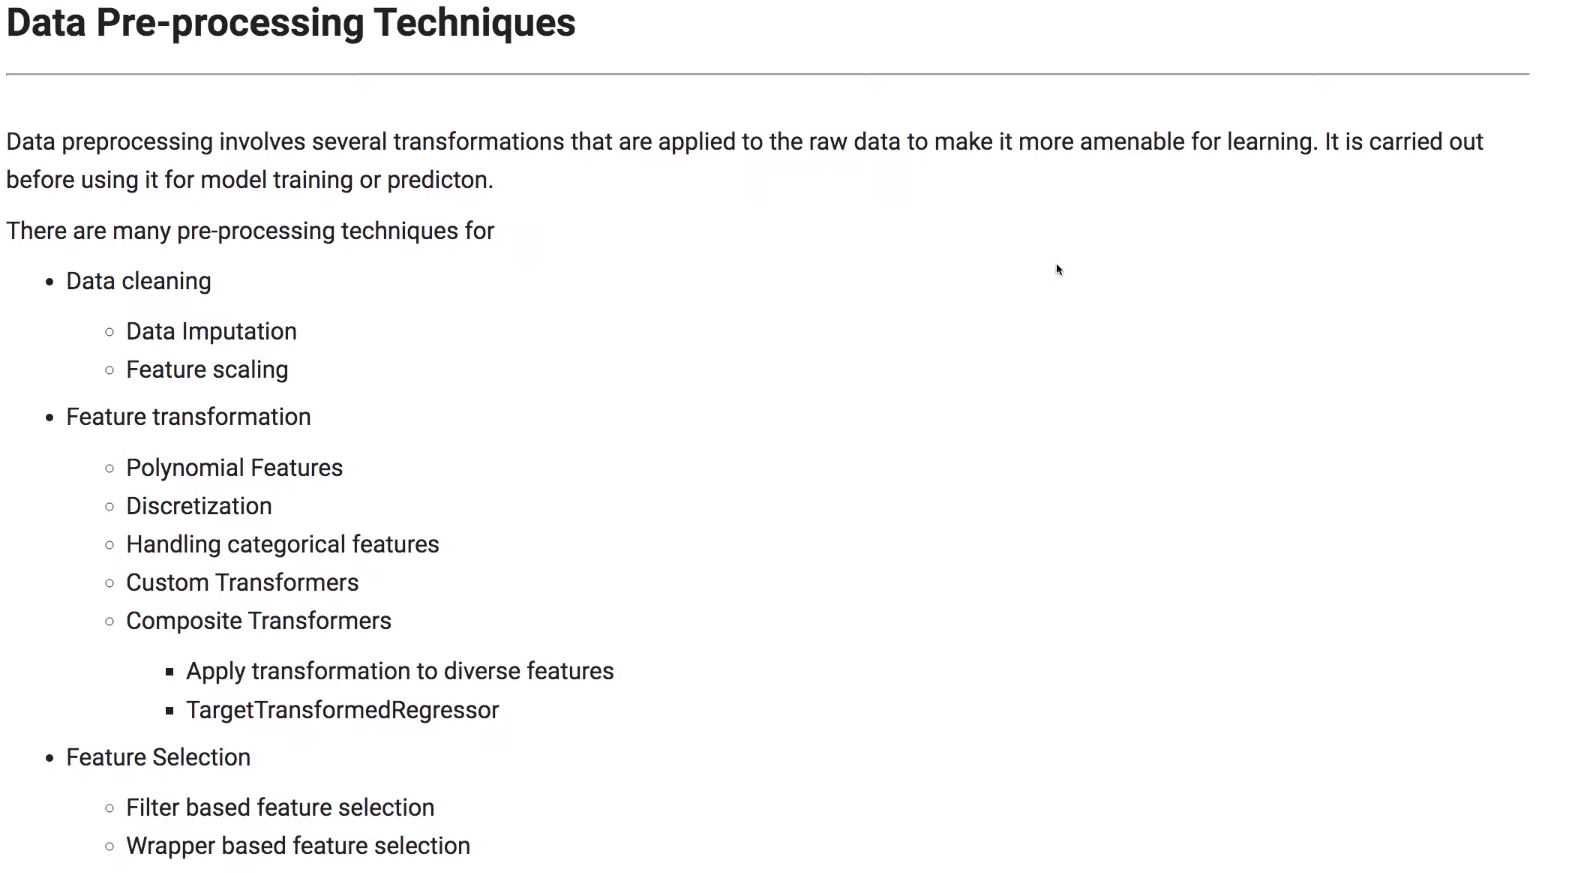
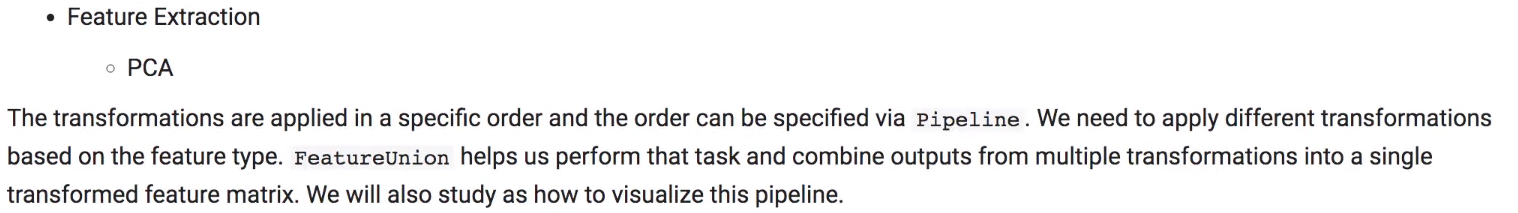
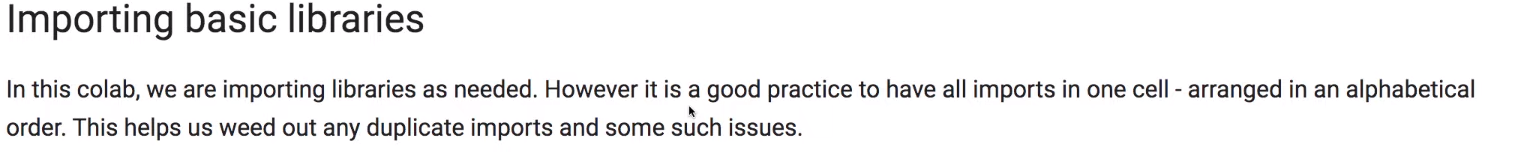

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='dark')

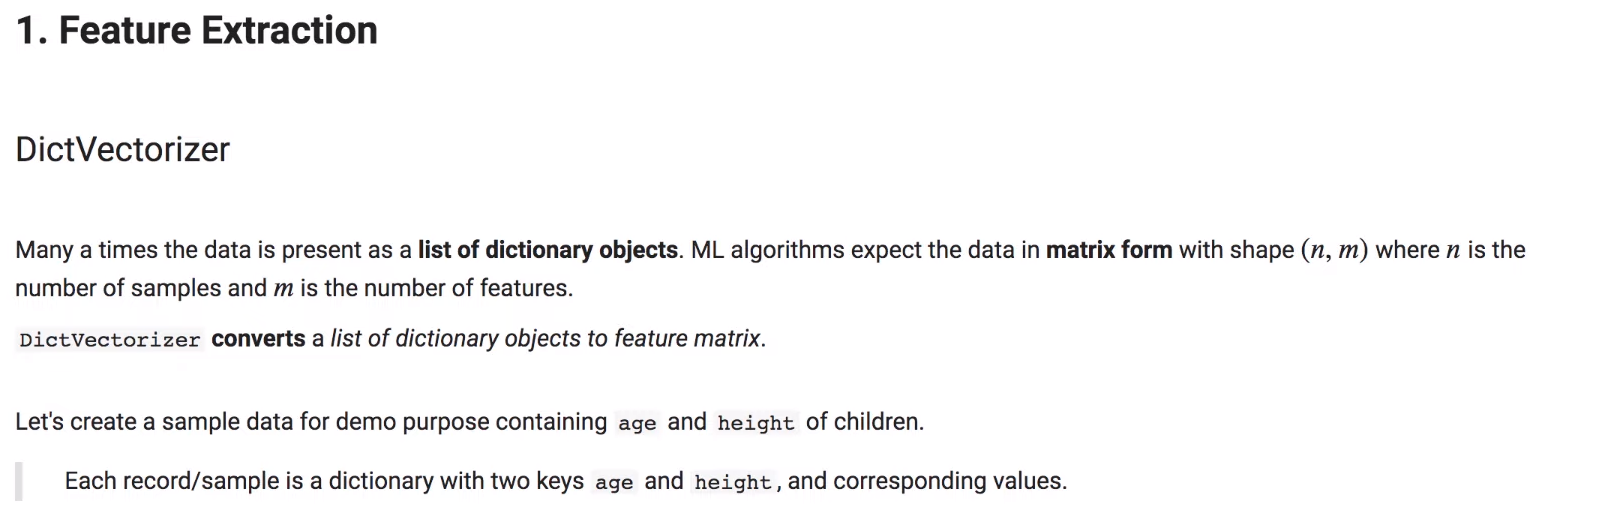

In [3]:
data = [
    {'age': 4, 'height': 96.0},
    {'age': 1, 'height': 73.9},
    {'age': 3, 'height': 88.9},
    {'age': 2, 'height': 81.6},        
]

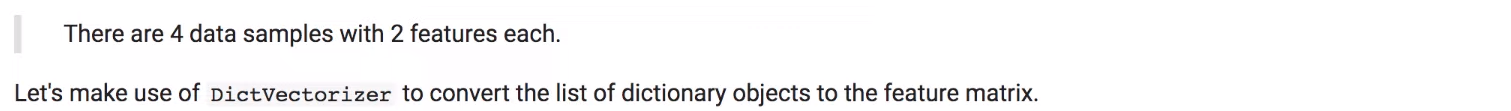

In [5]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed, data_transformed.shape

(array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]),
 (4, 2))

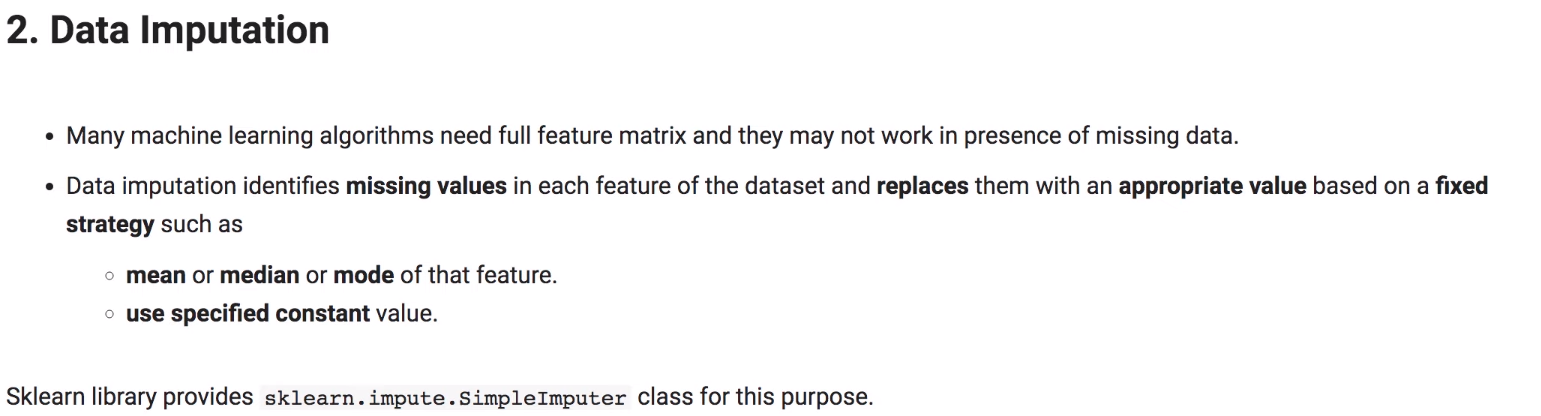

In [6]:
from sklearn.impute import SimpleImputer

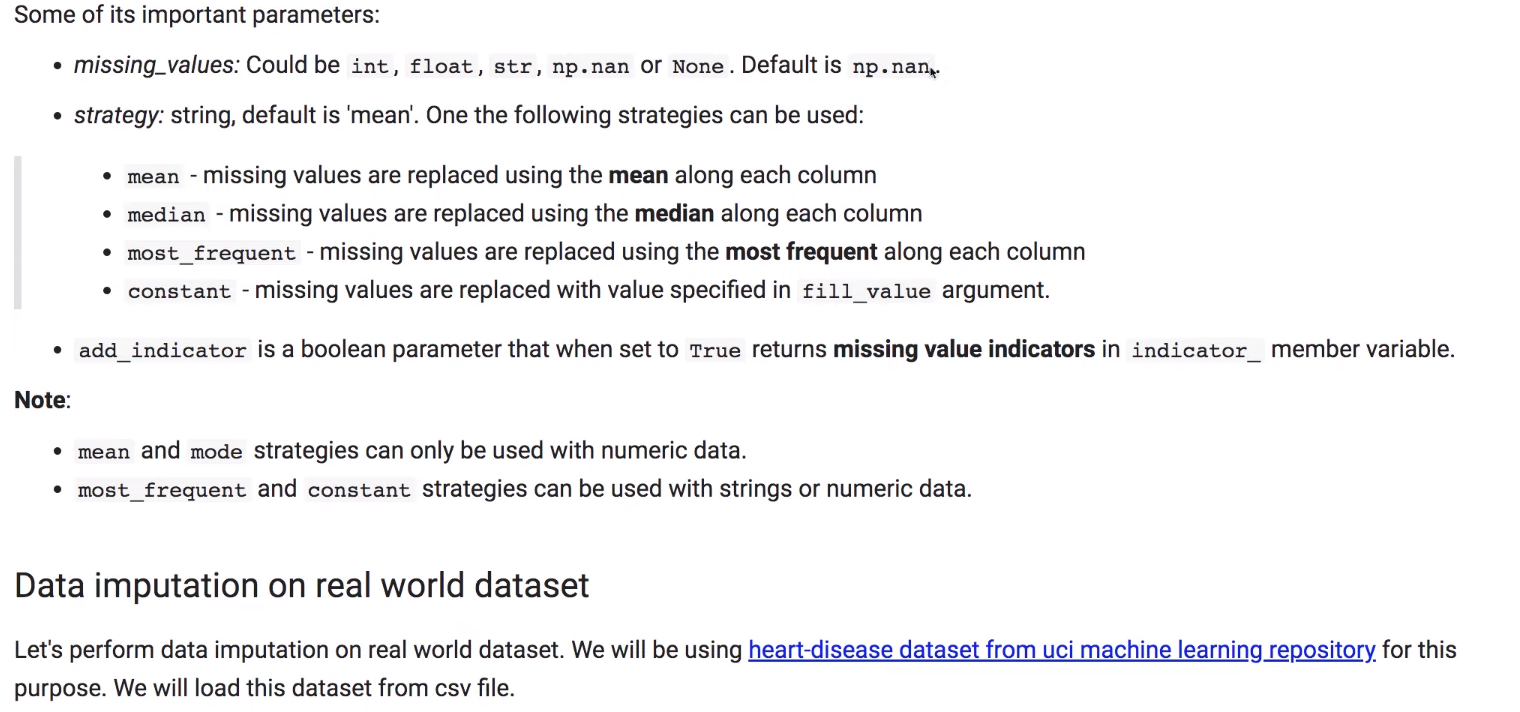

In [7]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

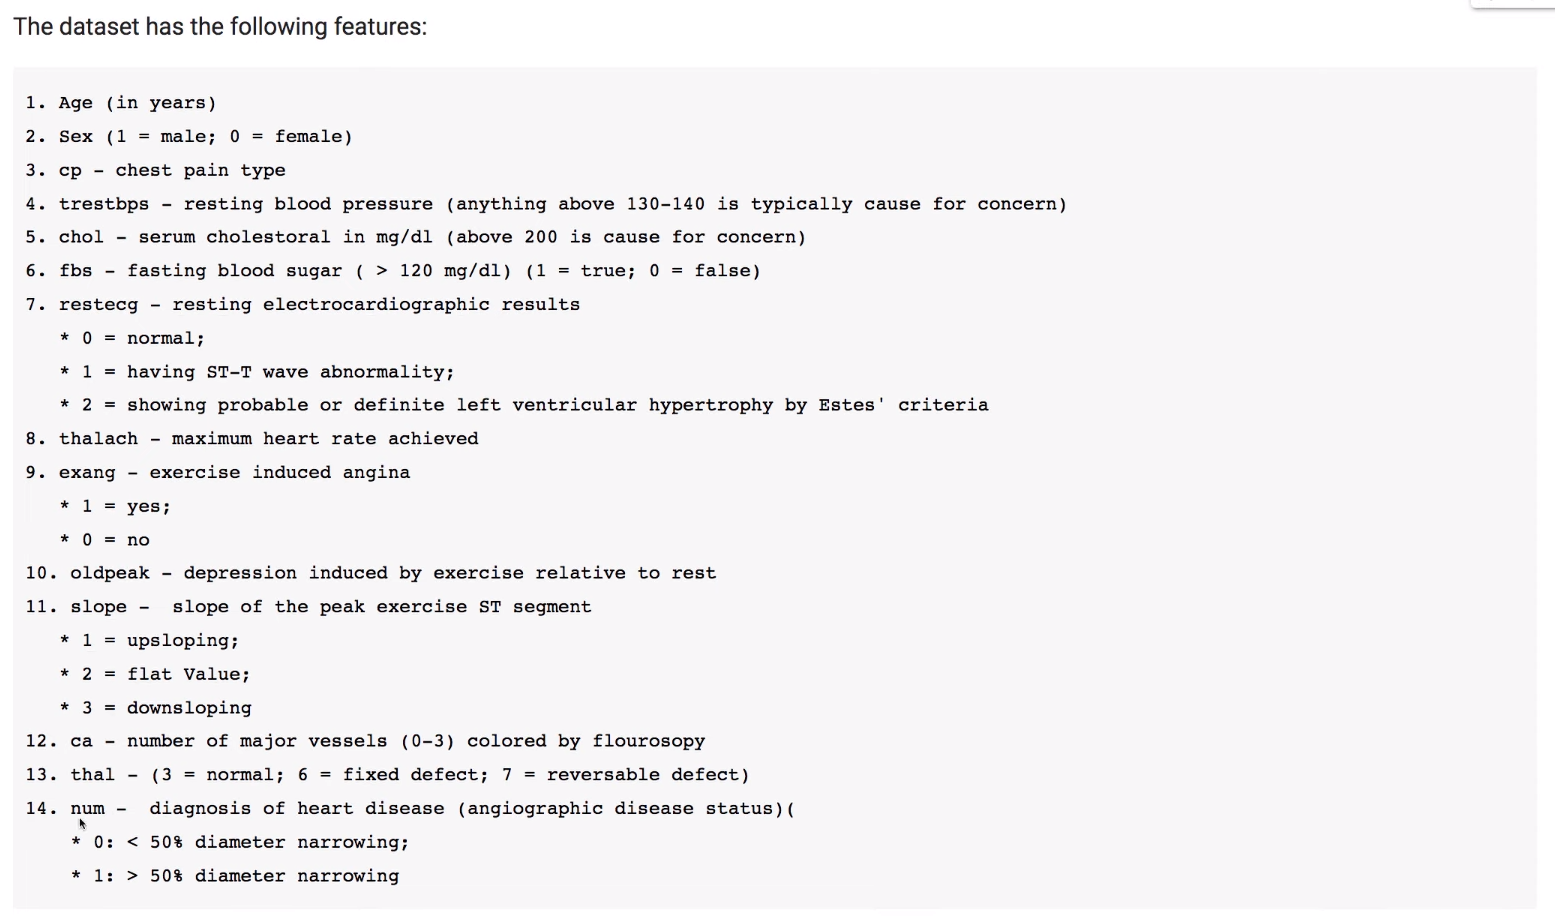
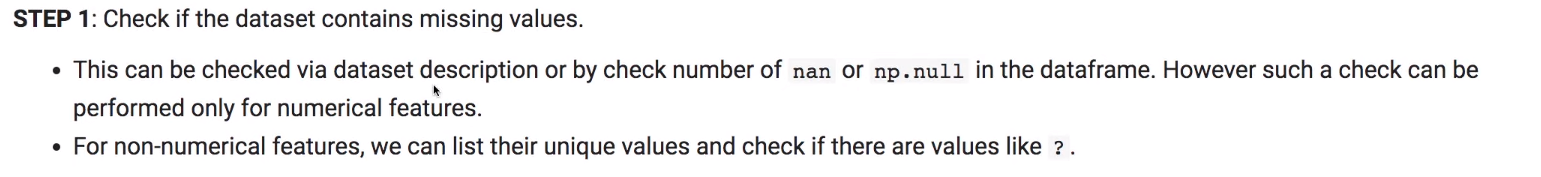

In [9]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


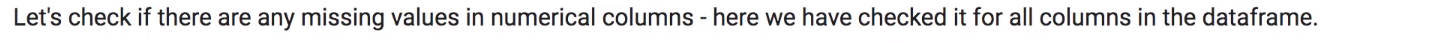

In [10]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

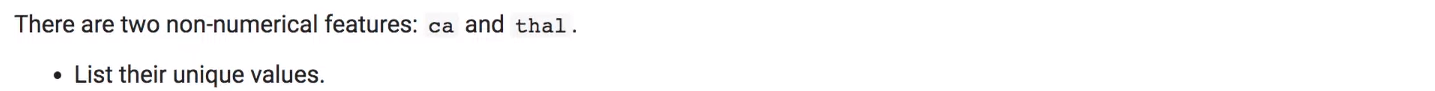

In [11]:
print('Unique values in ca:', heart_data.ca.unique())
print('Unique values in thal:', heart_data.thal.unique())

Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


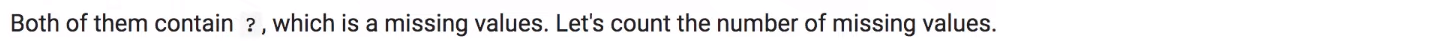


In [12]:
print('# missing values in ca:', heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('# missing values in thal:', heart_data.loc[heart_data.thal == '?', 'thal'].count())

# missing values in ca: 4
# missing values in thal: 2


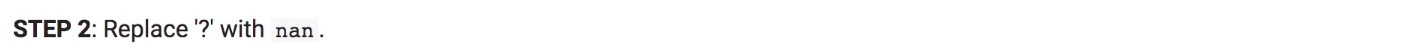

In [15]:
heart_data.replace('?', np.nan, inplace=True)
# heart_data

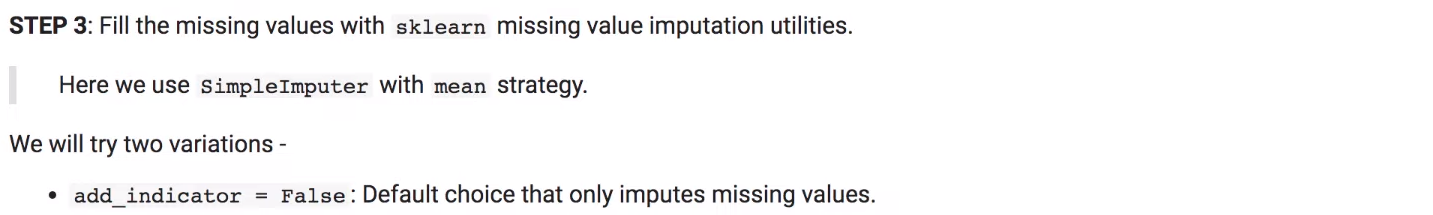

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)
heart_data_imputed

(303, 14)


array([[63.       ,  1.       ,  1.       , ...,  0.       ,  6.       ,
         0.       ],
       [67.       ,  1.       ,  4.       , ...,  3.       ,  3.       ,
         2.       ],
       [67.       ,  1.       ,  4.       , ...,  2.       ,  7.       ,
         1.       ],
       ...,
       [57.       ,  1.       ,  4.       , ...,  1.       ,  7.       ,
         3.       ],
       [57.       ,  0.       ,  2.       , ...,  1.       ,  3.       ,
         1.       ],
       [38.       ,  1.       ,  3.       , ...,  0.6722408,  3.       ,
         0.       ]])

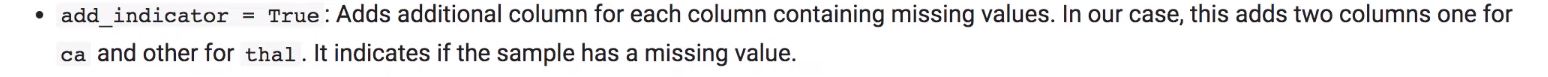

In [20]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)
heart_data_imputed_with_indicator

(303, 16)


array([[63.,  1.,  1., ...,  0.,  0.,  0.],
       [67.,  1.,  4., ...,  2.,  0.,  0.],
       [67.,  1.,  4., ...,  1.,  0.,  0.],
       ...,
       [57.,  1.,  4., ...,  3.,  0.,  0.],
       [57.,  0.,  2., ...,  1.,  0.,  0.],
       [38.,  1.,  3., ...,  0.,  1.,  0.]])

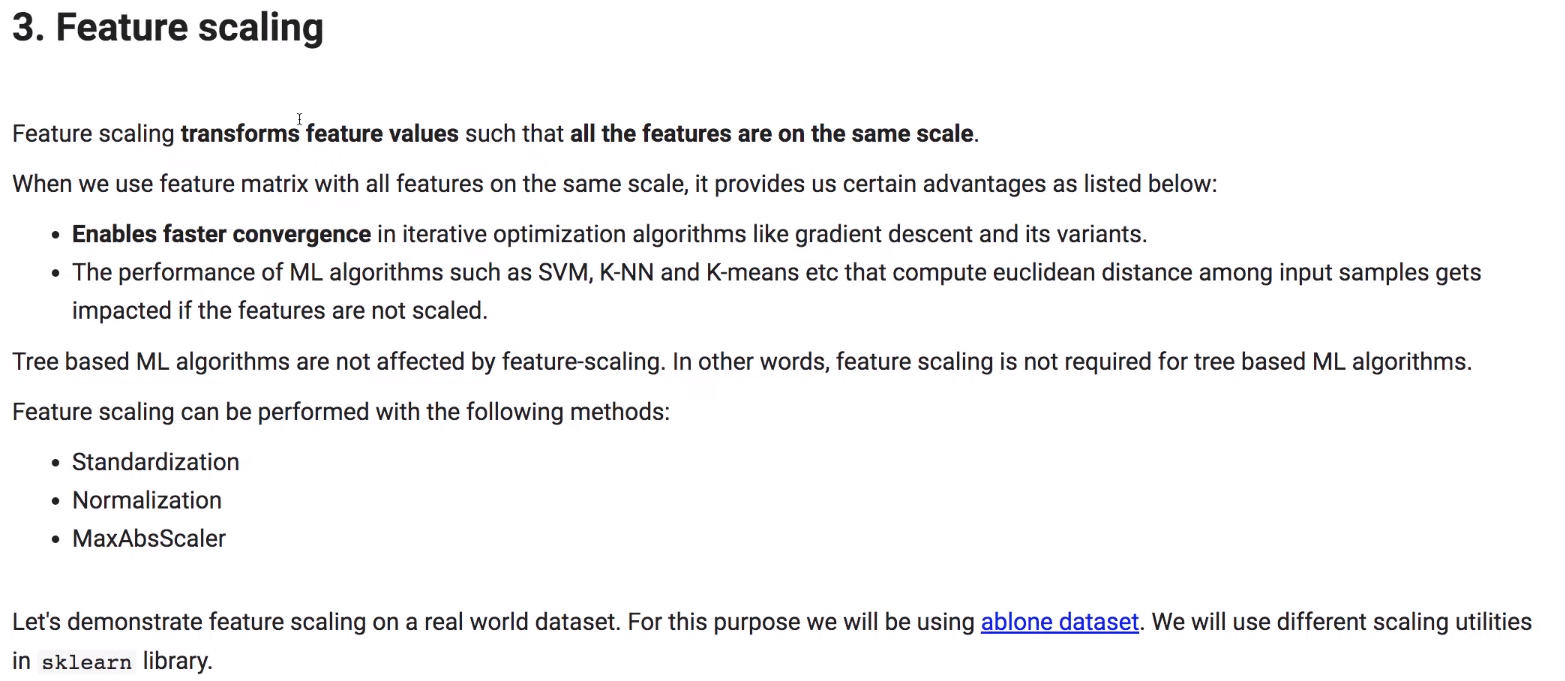

In [ ]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shuked Weight', 'Viscera Weight', 'Shell Weight', 'Rings']
S